In [15]:
##### Flip to get 16 images for each category #####
# from PIL import Image, ImageOps
# for i in range(1,9):
#     # print(i)
#     im = Image.open(f'data/kaggle/muffin/muffin-{i}.jpeg')
#     im_mirror = ImageOps.mirror(im)
#     im_mirror.save(f'data/kaggle/muffin/muffin-{i+8}.jpeg', quality=100)

In [1]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
import time
import os
from copy import copy
from copy import deepcopy
import torch.nn.functional as F

# Allow augmentation transform for training set, no augementation for val/test set
# Normalize(mean, std, inplace=False)
# mean, std = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
mean, std = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)

preprocess_augment = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])


full_train_dataset = torchvision.datasets.ImageFolder('data/kaggle', transform=preprocess_augment)
train_dataset = torch.utils.data.Subset(full_train_dataset, [0,8])
# train_dataset.transform = preprocess
# test_dataset = torchvision.datasets.ImageFolder('data/test', transform=preprocess)
# print(test_dataset)
# test_dataloader   = torch.utils.data.DataLoader(test_dataset  , batch_size=BATCH_SIZE,shuffle=False, num_workers=NUM_WORKERS)
# train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [1600, 1988-1600])
# # DataLoaders for the three datasets
BATCH_SIZE=4
NUM_WORKERS=2
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE,shuffle=True , num_workers=NUM_WORKERS)
# val_dataloader   = torch.utils.data.DataLoader(val_dataset  , batch_size=BATCH_SIZE,shuffle=False, num_workers=NUM_WORKERS)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
tensor([0, 1])


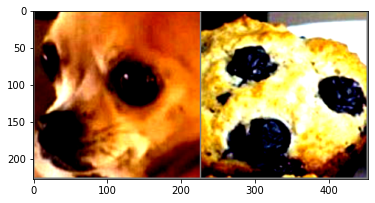

tensor([0, 1]) ['chihuahua' 'muffin']


In [10]:
import matplotlib.pyplot as plt
import numpy as np
# get some random training images
dataiter = iter(train_dataloader)
images, labels = dataiter.next()
print(labels)
toshow = torchvision.utils.make_grid(images)
toshow = toshow / 2 + 0.5     # unnormalize
npimg = toshow.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()
classes = np.array(['chihuahua','muffin'])
print(labels, classes[labels])